Mean values:
games         14.125000
att          478.406250
cmp          306.562500
comp_pct      64.296875
yds         3515.062500
ypa            7.375000
td            22.375000
int           10.343750
sack          32.312500
loss         217.093750
rating        93.387500
dtype: float64

Standard deviations:
games         2.406309
att         110.360366
cmp          68.929575
comp_pct      3.627537
yds         852.437489
ypa           0.796768
td            6.256609
int           5.839849
sack         10.514008
loss         70.786075
rating       11.054725
dtype: float64


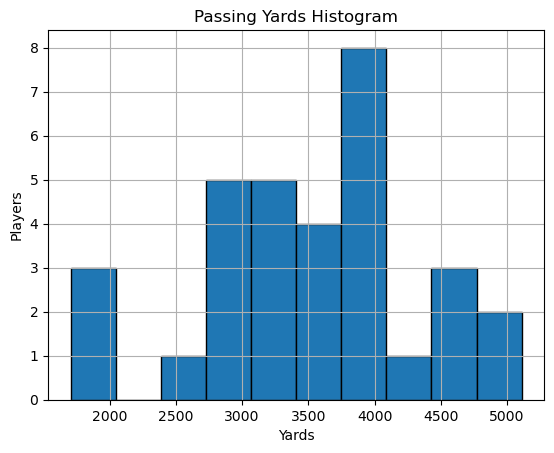

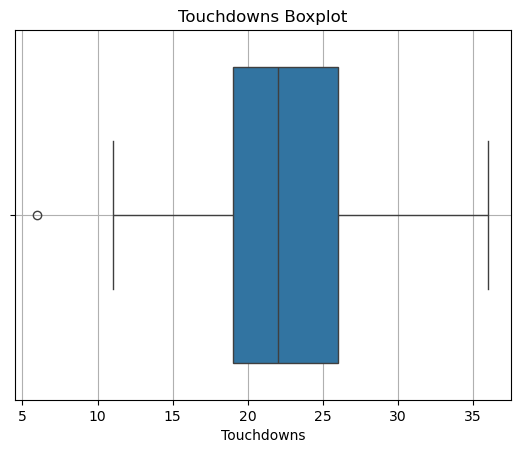


Touchdown outliers:
          name   td
24  Joe Flacco  6.0

P(Brown Hair): 0.512
P(Blue Eyes): 0.247
P(Blue | Brown): 0.217
P(Brown | Blue): 0.450
P(Both): 0.111
Independent: False


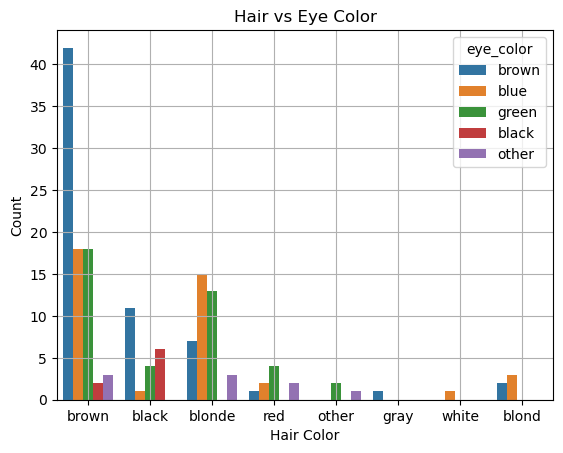


Ensemble Accuracy (63% x 15): 0.8513
Min Accuracy Needed: 71%
Min Models (63% each) for 95%: 39


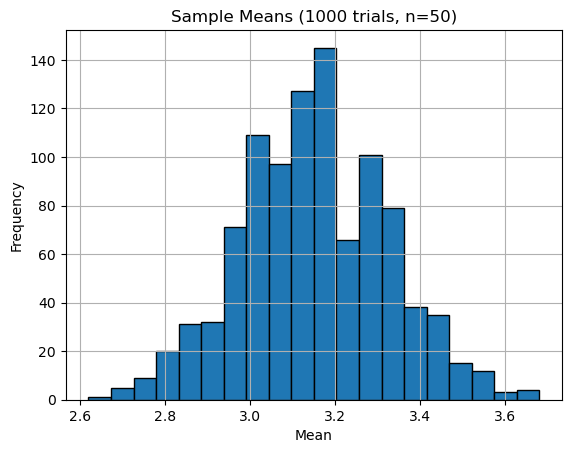


Sample Mean: 3.152
Sample Std Dev: 0.174
Theoretical Mean: 3.150
Theoretical Std Dev: 0.169


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import random

# Problem 1 - QB Stats Summary

qb_df = pd.read_csv("qb_stats.csv")

# Mean values of the numerical stats
print("Mean values:")
print(qb_df.select_dtypes(include='number').mean())

# Standard deviation of each stat
print("\nStandard deviations:")
print(qb_df.select_dtypes(include='number').std())

# Histogram for passing yards
plt.hist(qb_df['yds'].dropna(), bins=10, edgecolor='black')
plt.title('Passing Yards Histogram')
plt.xlabel('Yards')
plt.ylabel('Players')
plt.grid(True)
plt.show()

# Boxplot for touchdowns to spot outliers
sns.boxplot(x=qb_df['td'])
plt.title('Touchdowns Boxplot')
plt.xlabel('Touchdowns')
plt.grid(True)
plt.show()

# Finding outliers using IQR
q1 = qb_df['td'].quantile(0.25)
q3 = qb_df['td'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
outliers = qb_df[(qb_df['td'] < low) | (qb_df['td'] > high)]
print("\nTouchdown outliers:")
print(outliers[['name', 'td']])

# ------------------------------------------
# Problem 2 - Probabilities from Survey Data
# ------------------------------------------

survey_df = pd.read_csv("survey_data.csv")

# Probability of brown hair
p_brown = (survey_df['hair_color'] == 'brown').mean()

# Probability of blue eyes
p_blue = (survey_df['eye_color'] == 'blue').mean()

# P(Blue Eyes | Brown Hair)
p_blue_given_brown = (survey_df[survey_df['hair_color'] == 'brown']['eye_color'] == 'blue').mean()

# P(Brown Hair | Blue Eyes)
p_brown_given_blue = (survey_df[survey_df['eye_color'] == 'blue']['hair_color'] == 'brown').mean()

# Checking independence
p_both = ((survey_df['hair_color'] == 'brown') & (survey_df['eye_color'] == 'blue')).mean()
independent = np.isclose(p_both, p_brown * p_blue)

print(f"\nP(Brown Hair): {p_brown:.3f}")
print(f"P(Blue Eyes): {p_blue:.3f}")
print(f"P(Blue | Brown): {p_blue_given_brown:.3f}")
print(f"P(Brown | Blue): {p_brown_given_blue:.3f}")
print(f"P(Both): {p_both:.3f}")
print(f"Independent: {independent}")

# Bar plot for visual breakdown
sns.countplot(data=survey_df, x='hair_color', hue='eye_color')
plt.title('Hair vs Eye Color')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Problem 3 - Ensemble Voting Accuracy
# -------------------------------------

# Case: 15 models with 63% accuracy
n_models = 15
acc = 0.63
needed = n_models // 2 + 1
ensemble_acc = 1 - binom.cdf(needed - 1, n_models, acc)
print(f"\nEnsemble Accuracy (63% x 15): {ensemble_acc:.4f}")

# Find lowest accuracy to reach 95% ensemble accuracy
for a in range(64, 101):
    if 1 - binom.cdf(needed - 1, n_models, a / 100) >= 0.95:
        min_individual_acc = a
        break
print(f"Min Accuracy Needed: {min_individual_acc}%")

# Find how many models needed for 95% ensemble at 63%
for m in range(15, 100, 2):
    majority = m // 2 + 1
    if 1 - binom.cdf(majority - 1, m, acc) >= 0.95:
        min_models = m
        break
print(f"Min Models (63% each) for 95%: {min_models}")

# --------------------------------------
# Problem 4 - Sampling from PMF
# --------------------------------------

# I made up this PMF for values 1–5
x_vals = [1, 2, 3, 4, 5]
pmf = [0.1, 0.2, 0.3, 0.25, 0.15]  # Sums to 1

# Generate 50 values using that PMF and return the mean
def sample_mean():
    return np.mean(random.choices(x_vals, weights=pmf, k=50))

# Repeat that 1000 times and save all means
means = [sample_mean() for _ in range(1000)]

# Show histogram of sample means
plt.hist(means, bins=20, edgecolor='black')
plt.title('Sample Means (1000 trials, n=50)')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Stats from the samples
empirical_mean = np.mean(means)
empirical_std = np.std(means, ddof=1)

# Theoretical values
expected_mean = sum([x * p for x, p in zip(x_vals, pmf)])
expected_var = sum([(x - expected_mean)**2 * p for x, p in zip(x_vals, pmf)])
expected_std = (expected_var / 50) ** 0.5

print(f"\nSample Mean: {empirical_mean:.3f}")
print(f"Sample Std Dev: {empirical_std:.3f}")
print(f"Theoretical Mean: {expected_mean:.3f}")
print(f"Theoretical Std Dev: {expected_std:.3f}")
